In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
htru2 = fetch_ucirepo(id=372)

# data (as pandas dataframes)
X = htru2.data.features
y = htru2.data.targets

# metadata
print(htru2.metadata)

# variable information
print(htru2.variables)


{'uci_id': 372, 'name': 'HTRU2', 'repository_url': 'https://archive.ics.uci.edu/dataset/372/htru2', 'data_url': 'https://archive.ics.uci.edu/static/public/372/data.csv', 'abstract': 'Pulsar candidates collected during the HTRU survey. Pulsars are a type of star, of considerable scientific interest. Candidates must be classified in to pulsar and non-pulsar classes to aid discovery.', 'area': 'Physics and Chemistry', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 17898, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5DK6R', 'creators': ['Robert Lyon'], 'intro_paper': {'ID': 460, 'type': 'NATIVE', 'title': 'Fifty years of pulsar candidate selection: from simple filters to a new principled real-time classification approach', 'a

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


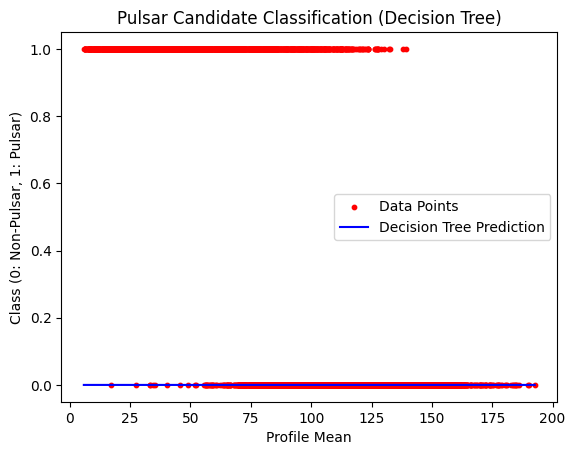

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X, y.values)
X_single_feature = X.iloc[:, 0].values.reshape(-1, 1)
y_single_target = y
X_grid = np.arange(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 0.01).reshape(-1, 1)
X_grid_full = np.tile(X.mean().values.reshape(1, -1), (X_grid.shape[0], 1))
X_grid_full[:, 0] = X_grid.flatten()
plt.scatter(X.iloc[:, 0], y, color='red', s=10, label='Data Points')
plt.plot(X_grid, classifier.predict(X_grid_full), color='blue', label='Decision Tree Prediction')
plt.title('Pulsar Candidate Classification (Decision Tree)')
plt.xlabel('Profile Mean')
plt.ylabel('Class (0: Non-Pulsar, 1: Pulsar)')
plt.legend()
plt.show()

# plt.figure(figsize=(20, 10))
# plot_tree(classifier,
#           filled=True,
#           feature_names=htru2.variables[:-1]['name'].tolist(),  # Feature names (excluding the target)
#           class_names=['Non-Pulsar (0)', 'Pulsar (1)'],  # Class names
#           rounded=True,
#           fontsize=14)
# plt.title('Decision Tree for Pulsar Classification')
# plt.show()

from sklearn.tree import export_graphviz

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot', feature_names =['Profile_mean','DM_kurtosis','DM_skewness','DM_stdev','DM_mean','Profile_kurtosis','Profile_skewness',' Profile_stdev'])